In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
    return image_paths, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,train/sad\14252.jpg,sad
1,train/fear\33805.jpg,fear
2,train/angry\14501.jpg,angry
3,train/sad\34982.jpg,sad
4,train/angry\13159.jpg,angry


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,test/angry\10052.jpg,angry
1,test/angry\10065.jpg,angry
2,test/angry\10079.jpg,angry
3,test/angry\10095.jpg,angry
4,test/angry\10121.jpg,angry


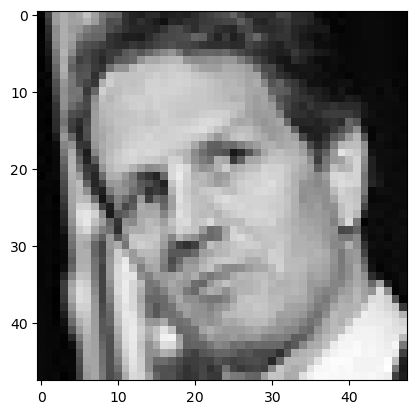

In [6]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray')

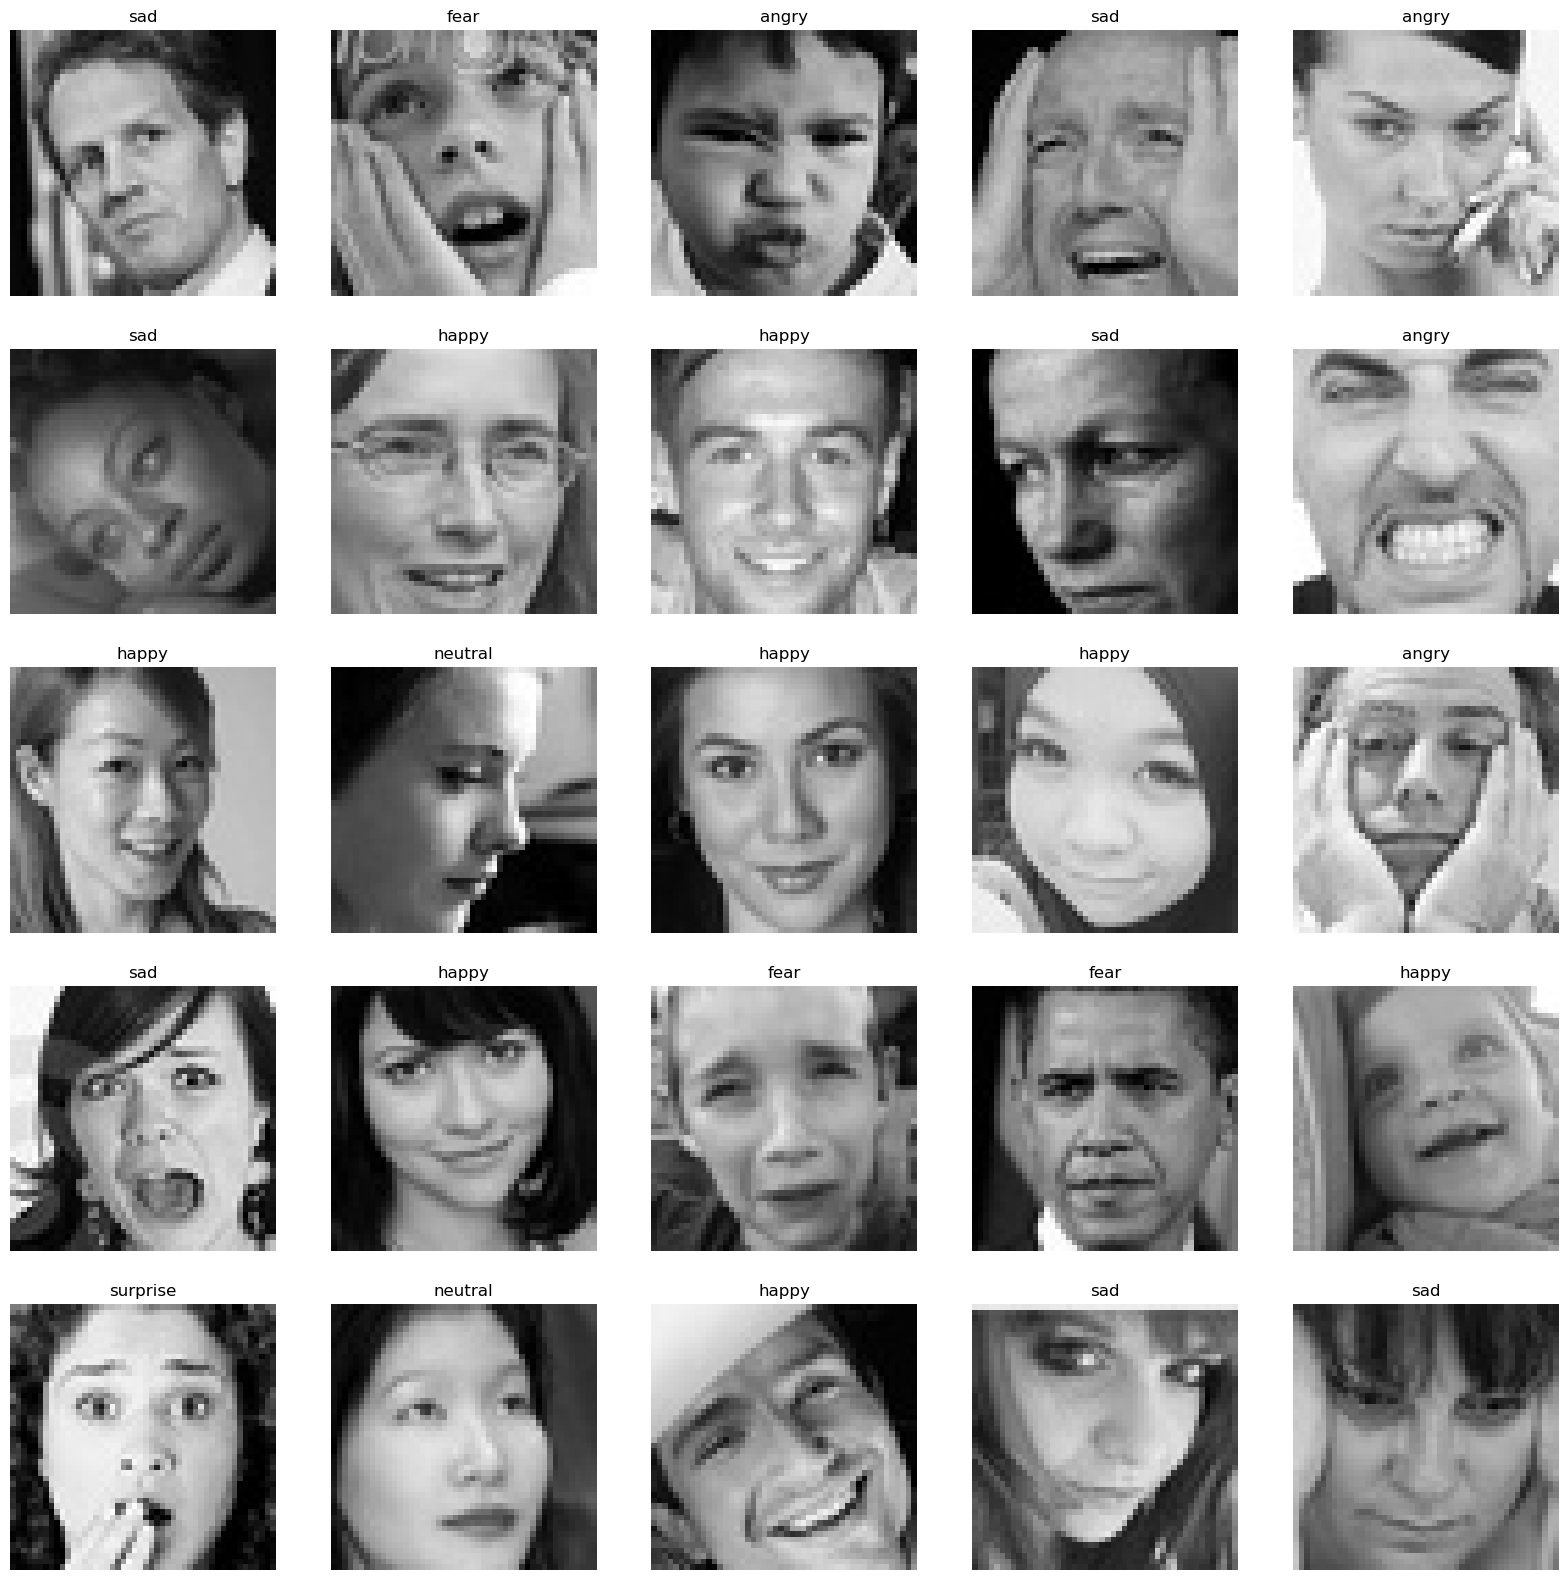

In [7]:
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [8]:
#Feature Extraction
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale="True")
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [9]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [17]:
input_shape = (48, 48, 1)
output_class = 7

In [19]:
#Model Creation
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#fully connected layer
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [21]:
#train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 420s 2s/step - loss: 1.8228 - accuracy: 0.2439 - val_loss: 1.7961 - val_accuracy: 0.2615
Epoch 2/100
226/226 [==============================] - 403s 2s/step - loss: 1.7690 - accuracy: 0.2658 - val_loss: 1.6877 - val_accuracy: 0.3152
Epoch 3/100
226/226 [==============================] - 398s 2s/step - loss: 1.6337 - accuracy: 0.3491 - val_loss: 1.5199 - val_accuracy: 0.4157
Epoch 4/100
226/226 [==============================] - 397s 2s/step - loss: 1.5030 - accuracy: 0.4162 - val_loss: 1.3764 - val_accuracy: 0.4687
Epoch 5/100
226/226 [==============================] - 416s 2s/step - loss: 1.4344 - accuracy: 0.4442 - val_loss: 1.3072 - val_accuracy: 0.4990
Epoch 6/100
226/226 [==============================] - 486s 2s/step - loss: 1.3809 - accuracy: 0.4686 - val_loss: 1.2834 - val_accuracy: 0.5137
Epoch 7/100
226/226 [==============================] - 452s 2s/step - loss: 1.3447 - accuracy: 0.4823 - val_loss: 1.2393 - val_accuracy:

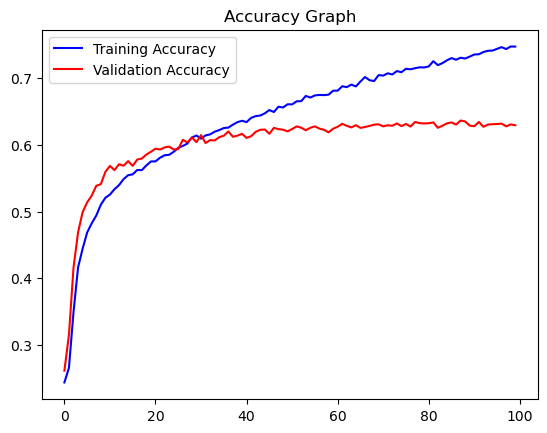

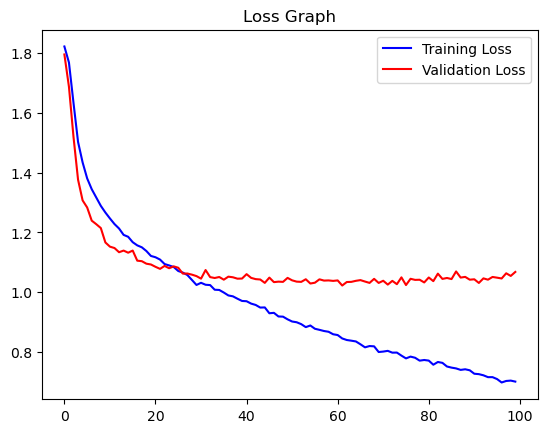

In [23]:
#Plot with data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()

plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: happy
1/1 [==============================] - 0s 39ms/step
Predicted Output: happy


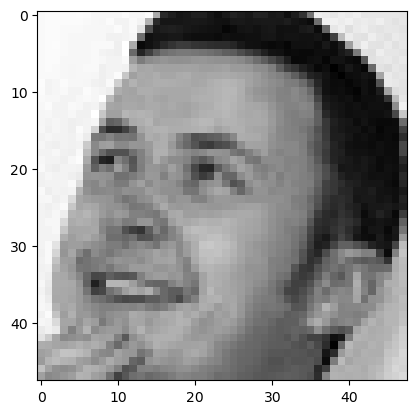

In [42]:
#Test with image data
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [45]:
model.save('facial_emotion_recognition_model.h5')